['V10', 'V48', 'V44', 'V11', 'V35', 'V51', 'V20', 'V3', 'V21', 'V15', 'V43', 'V0', 'V22', 'V45', 'V53', 'V27', 'V30', 'V50', 'V58', 'V46', 'V56', 'V28', 'V39']


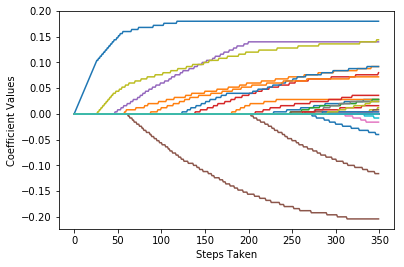

In [6]:
from urllib.request import urlopen
import sys
from math import sqrt
import matplotlib.pyplot as plot

#read data from uci data repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
for line in data:
    line = line.decode()
    #split on comma
    row = line.strip().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from
#string to numeric and convert "M" to 1 and "R" to 0
xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)
    
#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)
    
#Normalize labels
meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)
labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrow)]


#initialize a vector of coefficients beta
beta = [0.0] * ncol

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))

#number of steps to take
nSteps = 350
stepSize = 0.004
nzList = []

for i in range(nSteps):
    #calculate residuals
    residuals = [0.0] * nrow
    for j in range(nrow):
        labelsHat = sum([xNormalized[j][k] * beta[k] for k in range(ncol)])
        residuals[j] = labelNormalized[j] - labelsHat
        
    #calculate correlation between attribute columns from
    #normalized X and residual
    corr = [0.0] * ncol
    
    for j in range(ncol):
        corr[j] = sum([xNormalized[k][j] * residuals[k] for k in range(nrow)]) / nrow
        iStar = 0
        corrStar = corr[0]
        for j in range(1, (ncol)):
            if abs(corrStar) < abs(corr[j]):
                iStar = j; corrStar = corr[j]
                
    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))
    nzBeta = [index for index in range(ncol) if beta[index] != 0.0]
    for q in nzBeta:
        if (q in nzList) == False:
            nzList.append(q)
            
#make up names for columns of xNum
names = ['V' + str(i) for i in range(ncol)]
nameList = [names[nzList[i]] for i in range(len(nzList))]
print(nameList)

for i in range(ncol):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)
    
plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient Values"))
plot.show()